In [2]:
import numpy as np
import pandas as pd
import os
from PyAstronomy.pyTiming import pyPeriod

def print_dict_levels(d, level=0):
    # Iterate over the items in the dictionary
    for key, value in d.items():
        # Print the name of the level and the key
        print("Level {}: {}".format(level, key))
        # If the value is a dictionary, recursively call the function
        if isinstance(value, dict):
            print_dict_levels(value, level+1)
            
import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir
plotPath=homedir+'/plots/'
plotPath

'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots/'

In [3]:
### Background Light Curve
sourcesPath = "/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/backgroundSourcesLightcurve/"

# Get a list of all the files in the directory
sourceFiles = os.listdir(sourcesPath)
#lc = {} # {source: [0: sector 36, 1: sector 37, 3: header]}

from collections import defaultdict
# Generate an empty nested dictionary with 2 levels using defaultdict
header = {}
lc = defaultdict(lambda: defaultdict(dict))
allTargets = []

headerstring = "TIME[d] TIMECORR[d] BEST_PHOT_FLUX_RAW BEST_PHOT_FLUX_COR ERR_BEST_PHOT_FLUX_RAW PSF_FLUX_RAW PSF_FLUX_COR QFIT_PSF_FLUX_RAW AP1_FLUX_RAW AP1_FLUX_COR ERR_AP1_FLUX_RAW AP2_FLUX_RAW AP2_FLUX_COR ERR_AP2_FLUX_RAW AP3_FLUX_RAW AP3_FLUX_COR ERR_AP3_FLUX_RAW AP4_FLUX_RAW AP4_FLUX_COR ERR_AP4_FLUX_RAW AP5_FLUX_RAW AP5_FLUX_COR ERR_AP5_FLUX_RAW MSK_FLUX_RAW MSK_FLUX_COR ERR_MSK_FLUX_RAW SKY_LOCAL X_POSITION Y_POSITION DQUALITY"
headers = headerstring.split()

# Iterate over the list of files
for file in sourceFiles:
    if '.txt' in file and 'pathos' in file:
        filename = file
        target = file.split('_')[3]
        name, sector = target.split('-')[1], target.split('-')[2]
        data_raw = pd.DataFrame()
        data_raw = pd.read_csv(sourcesPath+filename, names=headers, skiprows=26, sep='\s+')
        if 's036' == sector:
            lc[name][0] = data_raw
            with open(sourcesPath+filename) as f: 
                header[name] = f.readlines()[0:21]
                ra, dec = header[name][15][12:33], header[name][16][12:33]
                mag = header[name][18][11:33]
                allTargets.append([name, float(ra), float(dec)])
                lc[name]['ra'] = float(ra)
                lc[name]['dec'] = float(dec)
                lc[name]['mag'] = float(mag)
                print(name, ra, dec, mag)
        else:
            lc[name][1] = data_raw
            
# print_dict_levels(lc)
# print_dict_levels(header)

00119862172    162.3261875024635    -53.30967909851959                14.6313 
00119862113    162.3523383266405    -53.31959941763895                10.9028 
00119862176    162.3489930973609    -53.30935471739266                14.6232 
00119862180      162.35108525885    -53.30791138406632                11.7705 
00119862617    162.3765186168608    -53.24641699941681                10.4354 
00119862111    162.3122099194187    -53.32070147745477                16.0553 
00119862142    162.3394223549227    -53.31473352591125                15.0623 
00119788311    162.1805869347559    -53.35804350681344      9.055300000000001 
00119862086    162.3230507560907    -53.32334909757537                15.4608 
00119788211    162.1860927469322    -53.32792508971284                 7.9821 


In [4]:
print(lc['00119862172']['ra'], lc['00119862172']['dec'], lc['00119862172']['mag']) 
print(lc['00119862617']['ra'], lc['00119862617']['dec']) 
for line in header['00119862172']: print(line)
for line in header['00119862617']: print(line)
targetsInfo = pd.DataFrame(allTargets, columns=['name', 'ra', 'dec'])

162.3261875024635 -53.30967909851959 14.6313
162.3765186168608 -53.24641699941681
# GAIAID  = ' 5353626607922101504' / Gaia DR3 identifier                         

# TICID   = ' 119862172'         / unique tess target identifier                 

# TICVER  = '8       '           / TICVER                                        

# TELESCOP= 'TESS    '           / Telescope                                     

# INSTRUME= 'TESS Photometer'    / Detector type                                 

# SECTOR  =                   36 / Observing sector                              

# CAMERA  =                  3.0 / Camera number                                 

# CCD     =                  1.0 / CCD chip number                               

# TSTART  =    59280.40910016512 / observation start time in MJD                 

# TSTOP   =    59305.48577748844 / observation stop time in MJD                  

# BJDREFI =              2457000 / integer part of BTJD reference date           

# BJD

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable
from astropy.utils.data import download_file

from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 10000  # Set the row limit for returned data

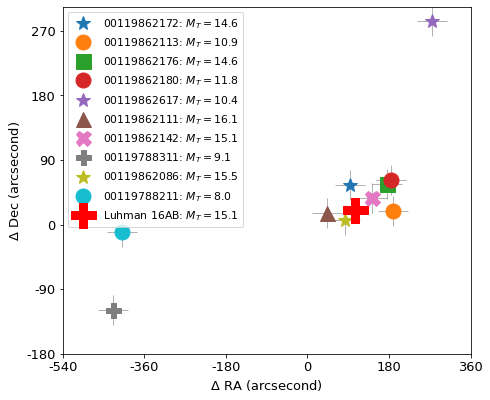

In [65]:
%matplotlib inline
# save = True
save = False

points = np.transpose([targetsInfo.ra, targetsInfo.dec])
skypoints = SkyCoord (points[:,0], points[:,1], unit='deg', frame='icrs')
markerStyles = ['*', 'o', 's', 'o', '*', '^', 'X', 'P', '*', 'o', 's']

luhman16coord = SkyCoord('10h49m18.91536s','-53d19m10.0776s', frame='icrs')

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(7, 5.75),
                       constrained_layout=False)
ax.plot(skypoints.ra.degree, 
                skypoints.dec.degree, ls='', marker='+', color='k', markersize=30, alpha=0.3)
sep, color = [], []

for i,coord in enumerate(skypoints):
    sep.append(luhman16coord.separation(coord).arcsecond)
    targetIDname = targetsInfo.name.iloc[i]
    strLabel = targetIDname+r': $M_T=%.1f$'%lc[targetIDname]['mag']
    g = ax.plot(coord.ra.degree, 
                coord.dec.degree, label=strLabel, marker=markerStyles[i], markersize=15, ls='')
    color.append(g[0].get_color())
    
ax.plot(luhman16coord.ra.degree, 
                luhman16coord.dec.degree, label=r'Luhman 16AB: $M_T=15.1$', marker='P', markersize=25, lw=10, ls='', c='r')

ax.set_xlabel(r'$\Delta$ RA (arcsecond)')
ax.set_ylabel(r'$\Delta$ Dec (arcsecond)')
# ax.set_ulim
xtick = [162.15, 162.2, 162.25, 162.3, 162.35, 162.4]
deltax = [(162.15-162.3)*3600, (162.2-162.3)*3600, 
         (162.25-162.3)*3600, (162.3-162.3)*3600, 
         (162.35-162.3)*3600, (162.4-162.3)*3600]
ax.set_xticks([]), ax.set_xticks(xtick)
ax.set_xticklabels([int(np.ceil(v)) for v in deltax])

ytick = [-53.25, -53.275, -53.30, -53.325, -53.35, -53.375]
deltay = [(-53.25+53.325)*3600, (-53.275+53.325)*3600, 
          (-53.30+53.325)*3600, (-53.325+53.325)*3600, 
          (-53.35+53.325)*3600, (-53.375+53.325)*3600]
ax.set_yticks([]), ax.set_yticks(ytick)
ax.set_yticklabels([int(np.floor(v)) for v in deltay])

plt.legend(fontsize="small")
plt.tight_layout()

if save:
    plt.savefig(plotPath+'backgroundSources_skycoord.png', dpi=300, bbox_inches = 'tight')
    plt.savefig(plotPath+'backgroundSources_skycoord.pdf', dpi=300, bbox_inches = 'tight')

In [22]:
luhman16coord.to_string('decimal')

'162.329 -53.3195'

In [28]:
lc[key][0]

,TIME[d],TIMECORR[d],BEST_PHOT_FLUX_RAW,BEST_PHOT_FLUX_COR,ERR_BEST_PHOT_FLUX_RAW,PSF_FLUX_RAW,PSF_FLUX_COR,QFIT_PSF_FLUX_RAW,AP1_FLUX_RAW,AP1_FLUX_COR,...,AP5_FLUX_RAW,AP5_FLUX_COR,ERR_AP5_FLUX_RAW,MSK_FLUX_RAW,MSK_FLUX_COR,ERR_MSK_FLUX_RAW,SKY_LOCAL,X_POSITION,Y_POSITION,DQUALITY
0,2280.909100,0.002677,38999.703125,39036.264780,10.114333,39064.527344,39068.680955,0.178939,19419.830078,19404.725221,...,46258.664062,46258.664062,13.503309,73756.421875,72998.267102,17.853765,799.190002,15.9885,16.2281,0
1,2280.916045,0.002677,39016.023438,39042.879404,10.118581,39082.656250,39083.759059,0.178686,19437.283203,19423.225388,...,46294.308594,46294.308594,13.511645,73804.945312,73074.108579,17.864666,800.449036,15.9886,16.2285,0
2,2280.922989,0.002677,39003.183594,39012.888621,10.120316,39024.066406,39020.294109,0.180082,19445.818359,19438.179635,...,46297.984375,46297.984375,13.517770,73843.664062,73232.471973,17.874771,801.659973,15.9889,16.2277,0
3,2280.929934,0.002677,39011.789062,39012.184431,10.126192,39062.003906,39052.696439,0.179702,19486.767578,19486.458620,...,46268.910156,46268.910156,13.526895,73763.234375,73187.263878,17.886387,803.902222,15.9894,16.2277,0
4,2280.936878,0.002677,39014.261719,39008.515978,10.130117,39050.878906,39043.610405,0.179730,19486.427734,19482.666429,...,46244.410156,46244.410156,13.533245,73835.796875,73358.378682,17.900824,805.517639,15.9899,16.2265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2305.958000,0.002976,33824.058594,33831.473589,7.886096,31766.500000,31773.958154,0.208649,16698.937500,16709.153378,...,42744.558594,42744.558594,9.362411,75233.304688,75250.917072,12.487240,124.537506,15.9421,16.2146,0
3473,2305.964944,0.002976,33819.789062,33828.789860,7.884753,31778.060547,31783.378919,0.207918,16685.224609,16700.602853,...,42767.109375,42767.109375,9.362300,75221.015625,75263.339753,12.483463,124.236183,15.9416,16.2147,0
3474,2305.971889,0.002976,33810.750000,33814.361091,7.884011,31740.435547,31749.181337,0.209001,16695.564453,16698.635844,...,42743.582031,42743.582031,9.360716,75247.765625,75234.220700,12.485959,124.308617,15.9426,16.2144,0
3475,2305.978833,0.002976,33843.156250,33844.352071,7.888485,31733.316406,31740.486526,0.210002,16724.025391,16727.784190,...,42796.593750,42796.593750,9.367926,75270.343750,75252.664858,12.490943,124.663132,15.9424,16.2151,0


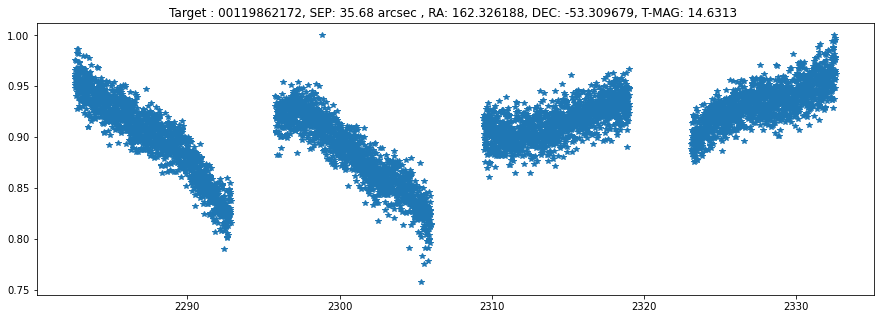

In [68]:
## PLOTTING
plt.close('all')
%matplotlib inline

for i,key in enumerate(lc):
    # print(key, lc[key]['ra'], lc[key]['dec'])
    RA, DEC, MAG = lc[key]['ra'], lc[key]['dec'], lc[key]['mag']
    s36raw = lc[key][0]
    s37raw = lc[key][1]
    
    ### Light curve cleaning: CORRECT METHOD
    skyLOCALnoise = 140 #(e s^-1)

    s36 = s36raw.query("DQUALITY == 0 & SKY_LOCAL<=%f & SKY_LOCAL>=%f"%(skyLOCALnoise, 50))
    sky36_threshold = s36.SKY_LOCAL.mean() + 4*s36.SKY_LOCAL.std()
    s36 = s36.query("SKY_LOCAL<=%f"%(sky36_threshold))

    s37 = s37raw.query("DQUALITY == 0 & SKY_LOCAL<=%f & SKY_LOCAL>=%f"%(skyLOCALnoise, 50))
    sky37_threshold = s37.SKY_LOCAL.mean() + 4*s37.SKY_LOCAL.std()
    s37 = s37.query("SKY_LOCAL<=%f"%(sky37_threshold))
    
    time0, lc0 = s36['TIME[d]'], s36['BEST_PHOT_FLUX_COR']
    lc0 = lc0/np.max(lc0)
    time1, lc1 = s37['TIME[d]'], s37['BEST_PHOT_FLUX_COR']
    lc1 = lc1/np.max(lc1)
    
    TIME = np.array(time0, time1)
    LC = np.array(lc0, lc1)
    
    lc[key]['norm'] = pd.DataFrame(np.transpose((TIME, LC, 0.045*LC)), columns=['TIME', 'FLUX', 'EFLUX'])
    
    if i == 0:
        plt.figure(figsize=(15,5))
        plt.title('Target : %s, SEP: %.2f arcsec , RA: %.6f, DEC: %.6f, T-MAG: %.4f '%(key, sep[i], float(RA), float(DEC), float(MAG)))
        g = plt.plot(time0, lc0, c=color[i], ls='', marker=markerStyles[i])
        plt.plot(time1, lc1, c=color[i], ls='', marker=markerStyles[i])

No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.


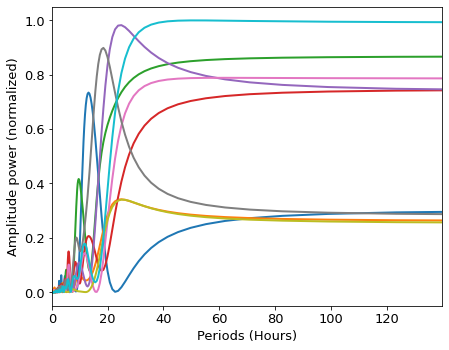

In [69]:
plt.close('all')
%matplotlib inline
maglim = 16
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(7,5.5))

# save = True
save = False 

for i,key in enumerate(lc):
    if lc[key]['mag'] < maglim:
        time, flux, eflux = lc[key]['norm'].TIME, lc[key]['norm'].FLUX, lc[key]['norm'].EFLUX
        RA, DEC, MAG = lc[key]['ra'], lc[key]['dec'], lc[key]['mag']

        frequen = np.linspace(0.0001,20.,10000)
        # Compute the GLS periodogram with default options.
        # Choose Zechmeister-Kuerster normalization explicitly
        clp = pyPeriod.Gls((time,flux,eflux), norm="ZK", freq=frequen,ofac=10)

        fr = clp.freq
        pw = clp.power
        hpp = 1./fr

        plt.plot(hpp, pw, '-', linewidth=2, color=color[i], alpha=1.0)
        plt.ylabel('Amplitude power (normalized)'), plt.xlabel('Periods (Hours)')
        # plt.title('PERIODIOGRAM, Target : %s, SEP: %.2f arcsec, \nRA: %.6f, DEC: %.6f, T-MAG: %.4f '%(key, sep[i], float(RA), float(DEC), float(MAG)))
        plt.xlim(0,140)
plt.xticks([])
plt.xticks([0,20,40,60,80,100,120])

if save:
    plt.savefig(plotPath+'backgroundSources_periodograms.png', dpi=300, bbox_inches = 'tight')
    plt.savefig(plotPath+'backgroundSources_periodograms.pdf', dpi=300, bbox_inches = 'tight')

No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.


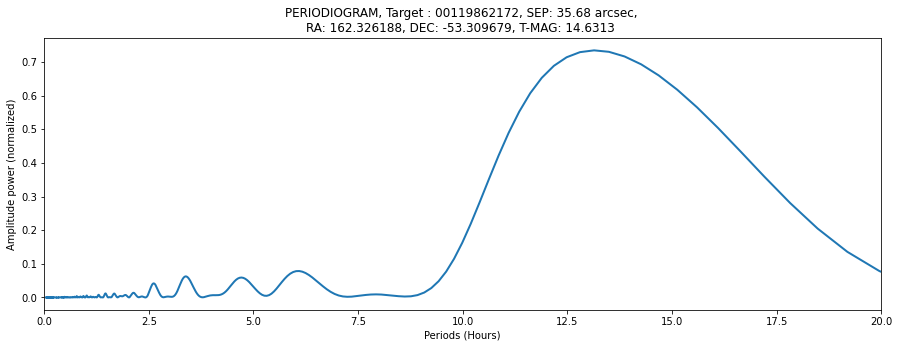

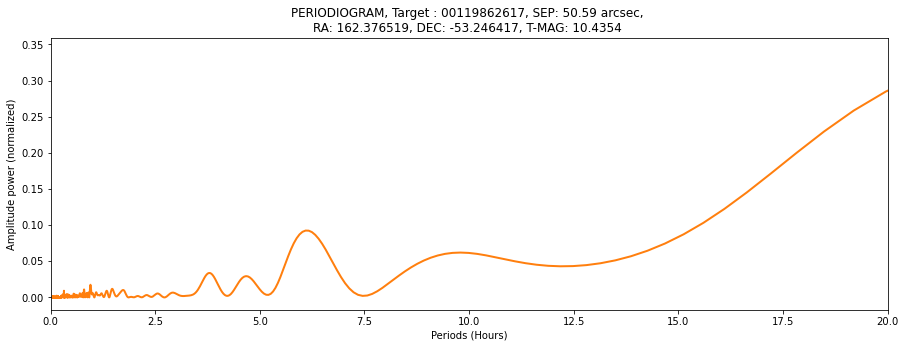

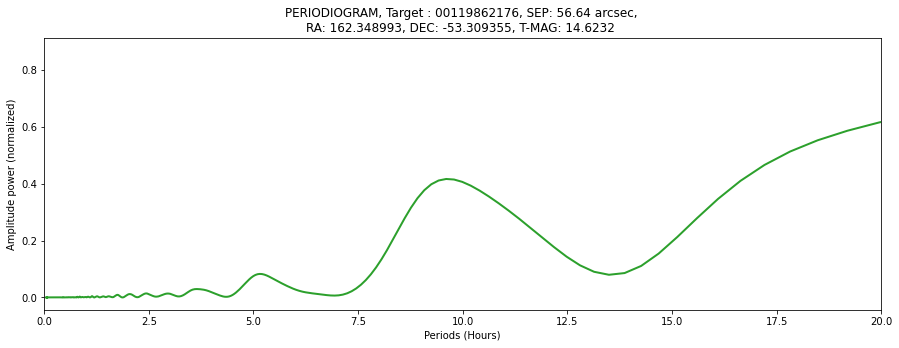

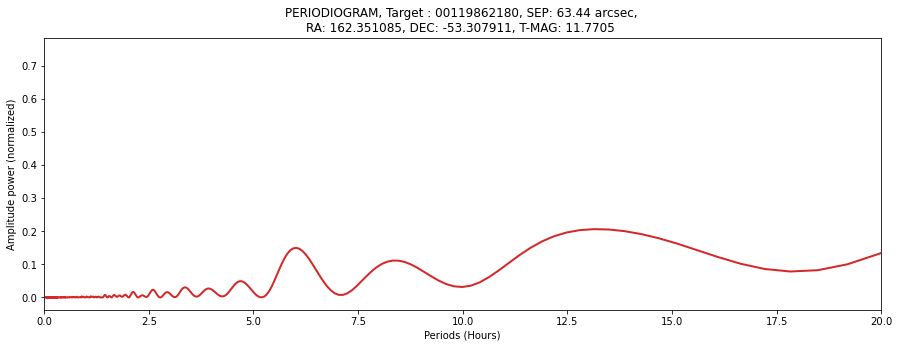

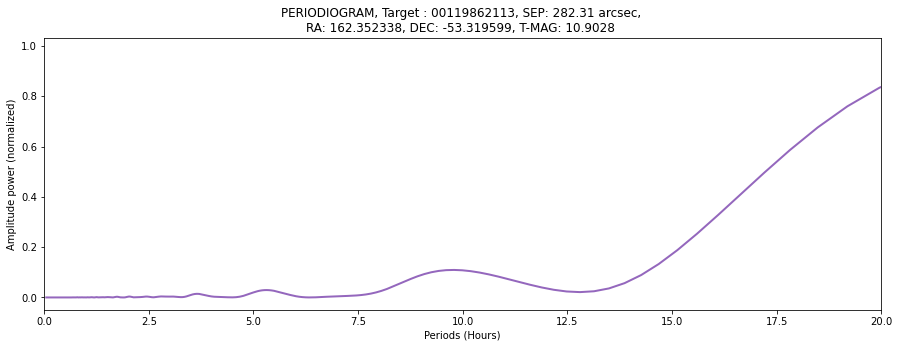

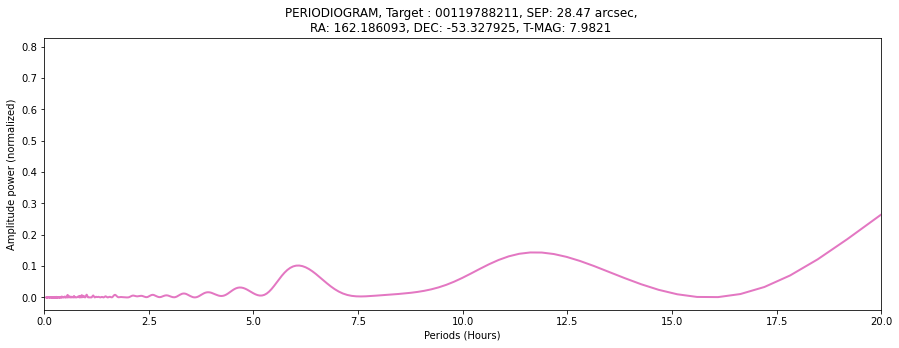

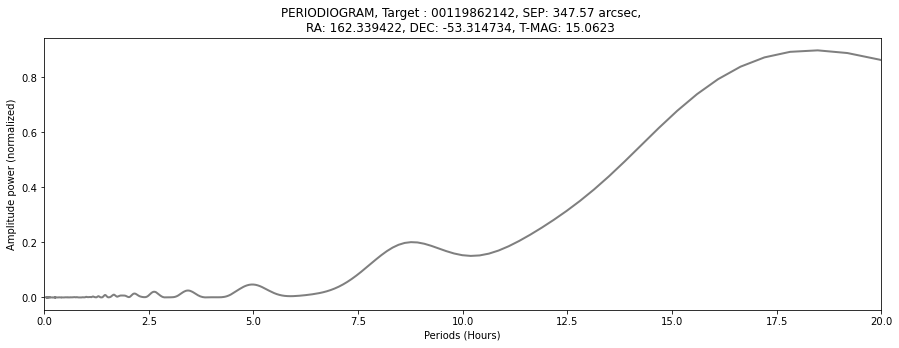

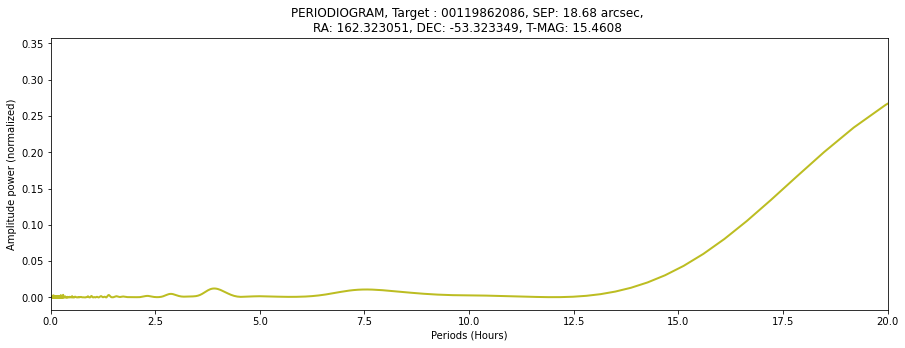

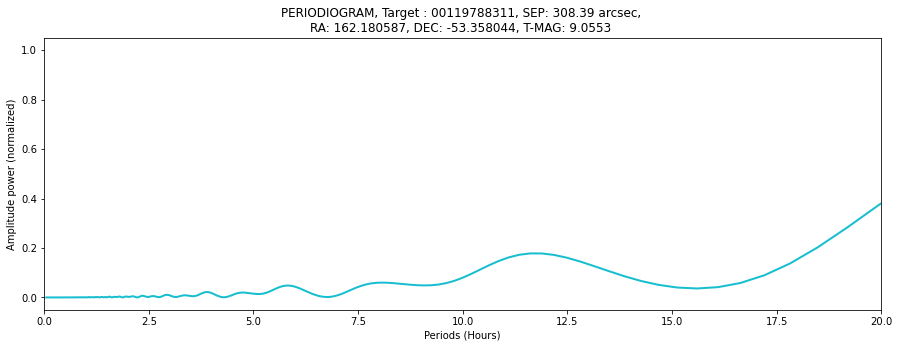

In [47]:
plt.close('all')
%matplotlib inline
maglim = 16

for i,key in enumerate(lc):
    if lc[key]['mag'] < maglim:
        time, flux, eflux = lc[key]['norm'].TIME, lc[key]['norm'].FLUX, lc[key]['norm'].EFLUX
        RA, DEC, MAG = lc[key]['ra'], lc[key]['dec'], lc[key]['mag']

        frequen = np.linspace(0.0001,20.,10000)
        # Compute the GLS periodogram with default options.
        # Choose Zechmeister-Kuerster normalization explicitly
        clp = pyPeriod.Gls((time,flux,eflux), norm="ZK", freq=frequen,ofac=10)

        fr = clp.freq
        pw = clp.power
        hpp = 1./fr

        plt.figure(figsize=(15,5))
        plt.plot(hpp, pw, '-', linewidth=2, color=color[i])
        plt.ylabel('Amplitude power (normalized)'), plt.xlabel('Periods (Hours)')
        plt.title('PERIODIOGRAM, Target : %s, SEP: %.2f arcsec, \nRA: %.6f, DEC: %.6f, T-MAG: %.4f '%(key, sep[i], float(RA), float(DEC), float(MAG)))
        plt.xlim(0,20)